In [57]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification

In [58]:
wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [59]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [60]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [61]:
dataset = pd.concat([pd.DataFrame(wine.data,columns=['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']),pd.DataFrame(wine.target,columns=['品类'])],axis=1)
dataset

,酒精,苹果酸,灰,灰的碱性,镁,总酚,类黄酮,非黄烷类酚类,花青素,颜色强度,色调,od280/od315稀释葡萄酒,脯氨酸,品类
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [62]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [69]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                  random_state=30,
                                  splitter="best",
                                  max_depth=4,
                                  min_samples_leaf=10,
                                  min_samples_split=10)
clf = clf.fit(Xtrain, Ytrain)

In [70]:
score = clf.score(Xtest, Ytest)
score

0.8333333333333334

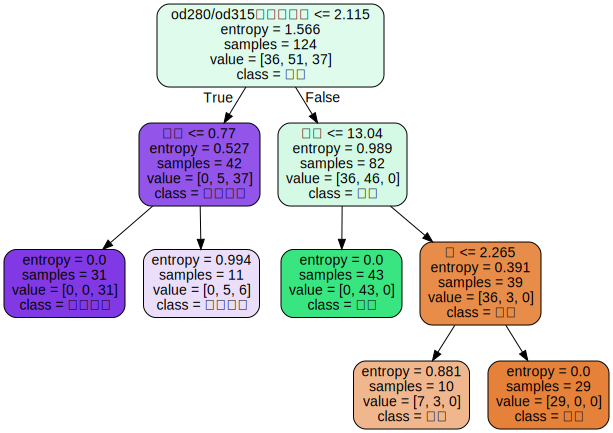

In [71]:
## conda install python-graphviz
## conda install graphviz

import graphviz
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
dot_data = tree.export_graphviz(clf
,out_file=None
,feature_names= feature_name
,class_names=["琴酒","雪莉","贝尔摩德"]
,filled=True
,rounded=True
)
graph = graphviz.Source(dot_data)
graph

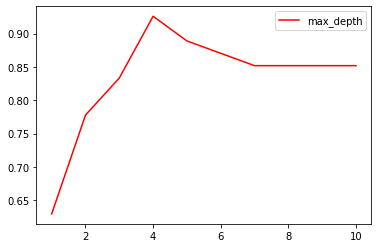

In [72]:
test =[]
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1,criterion="entropy",random_state=30,splitter="random")
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [73]:
#make_classification库生成随机的二分型数据
X, y = make_classification(n_samples=100, #生成100个样本
             n_features=2,  #包含2个特征，即生成二维数据
             n_redundant=0, #添加冗余特征0个
             n_informative=2, #包含信息的特征是2个
             random_state=1,  #随机模式1
             n_clusters_per_class=1 #每个簇内包含的标签类别有1个
            )
#在这里可以查看一下X和y，其中X是100行带有两个2特征的数据，y是二分类标签
#也可以画出散点图来观察一下X中特征的分布
#plt.scatter(X[:,0],X[:,1])
#从图上可以看出，生成的二分型数据的两个簇离彼此很远，这样不利于我们测试分类器的效果，因此我们使用np生成
#随机数组，通过让已经生成的二分型数据点加减0~1之间的随机数，使数据分布变得更散更稀疏
#注意，这个过程只能够运行一次，因为多次运行之后X会变得非常稀疏，两个簇的数据会混合在一起，分类器的效应会
#继续下降
rng = np.random.RandomState(2) #生成一种随机模式
X += 2 * rng.uniform(size=X.shape) #加减0~1之间的随机数
linearly_separable = (X, y) #生成了新的X，依然可以画散点图来观察一下特征的分布
#plt.scatter(X[:,0],X[:,1])
#用make_moons创建月亮型数据，make_circles创建环形数据，并将三组数据打包起来放在列表datasets中
datasets = [make_moons(noise=0.3, random_state=0),
      make_circles(noise=0.2, factor=0.5, random_state=1),
      linearly_separable]

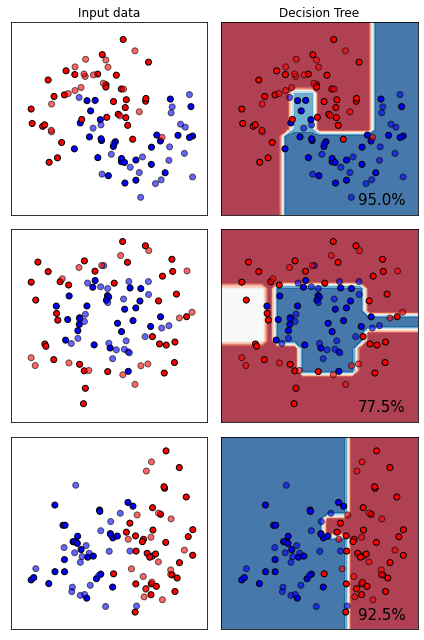

In [74]:

#创建画布，宽高比为6*9
figure = plt.figure(figsize=(6, 9))
#设置用来安排图像显示位置的全局变量i
i = 1
#开始迭代数据，对datasets中的数据进行for循环
for ds_index, ds in enumerate(datasets):
 
  #对X中的数据进行标准化处理，然后分训练集和测试集
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4,random_state=42)
 
  #找出数据集中两个特征的最大值和最小值，让最大值+0.5，最小值-0.5，创造一个比两个特征的区间本身更大一点的区间
    x1_min, x1_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    x2_min, x2_max = X[:, 1].min() - .5, X[:, 1].max() + .5
 
  #用特征向量生成网格数据，网格数据，其实就相当于坐标轴上无数个点
  #函数np.arange在给定的两个数之间返回均匀间隔的值，0.2为步长
  #函数meshgrid用以生成网格数据，能够将两个一维数组生成两个二维矩阵。
  #如果第一个数组是narray，维度是n，第二个参数是marray，维度是m。那么生成的第一个二维数组是以
    #narray为行，m行的矩阵，而第二个二维数组是以marray的转置为列，n列的矩阵
  #生成的网格数据，是用来绘制决策边界的，因为绘制决策边界的函数contourf要求输入的两个特征都必须是二维的
    array1,array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2),np.arange(x2_min, x2_max, 0.2))
  #接下来生成彩色画布
  #用ListedColormap为画布创建颜色，#FF0000正红，#0000FF正蓝
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
 
  #在画布上加上一个子图，数据为len(datasets)行，2列，放在位置i上
    ax = plt.subplot(len(datasets), 2, i)
#到这里为止，已经生成了0~1之间的坐标系3个了，接下来为我们的坐标系放上标题
  #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Input data")
 
  #将数据集的分布放到我们的坐标系上
  #先放训练集
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train,cmap=cm_bright,edgecolors='k')
  #放测试集
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test,cmap=cm_bright, alpha=0.6,edgecolors='k')
 
  #为图设置坐标轴的最大值和最小值，并设定没有坐标轴
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
 
  #每次循环之后，改变i的取值让图每次位列不同的位置
    i += 1
 
  #至此为止，数据集本身的图像已经布置完毕，运行以上的代码，可以看见三个已经处理好的数据集
 
  #############################从这里开始是决策树模型##########################
 
  #迭代决策树，首先用subplot增加子图，subplot(行，列，索引)这样的结构，并使用索引i定义图的位置
  #在这里，len(datasets)其实就是3，2是两列
  #在函数最开始，我们定义了i=1，并且在上边建立数据集的图像的时候，已经让i+1,所以i在每次循环中的取值是2，4，6
    ax = plt.subplot(len(datasets),2,i)
 
  #决策树的建模过程：实例化 → fit训练 → score接口得到预测的准确率
    clf = DecisionTreeClassifier(max_depth=5)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
 
  #绘制决策边界，为此，我们将为网格中的每个点指定一种颜色[x1_min，x1_max] x [x2_min，x2_max]
  #分类树的接口，predict_proba，返回每一个输入的数据点所对应的标签类概率
  #类概率是数据点所在的叶节点中相同类的样本数量/叶节点中的样本总数量
  #由于决策树在训练的时候导入的训练集X_train里面包含两个特征，所以我们在计算类概率的时候，也必须导入结构相同的数组，即是说，必须有两个特征
  #ravel()能够将一个多维数组转换成一维数组
  #np.c_是能够将两个数组组合起来的函数
  #在这里，我们先将两个网格数据降维降维成一维数组，再将两个数组链接变成含有两个特征的数据，再带入决策树模型，生成的Z包含数据的索引和每个样本点对应的类概率，再切片，且出类概率
    Z = clf.predict_proba(np.c_[array1.ravel(),array2.ravel()])[:, 1]
 
  #np.c_[np.array([1,2,3]), np.array([4,5,6])]
 
  #将返回的类概率作为数据，放到contourf里面绘制去绘制轮廓
    Z = Z.reshape(array1.shape)
    ax.contourf(array1, array2, Z, cmap=cm, alpha=.8)
 
  #将数据集的分布放到我们的坐标系上
  # 将训练集放到图中去
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='k')
  # 将测试集放到图中去
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
       edgecolors='k', alpha=0.6)
 
  #为图设置坐标轴的最大值和最小值
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
  #设定坐标轴不显示标尺也不显示数字
    ax.set_xticks(())
    ax.set_yticks(())
 
  #我们有三个坐标系，但我们只需要在第一个坐标系上有标题，因此设定if ds_index==0这个条件
    if ds_index == 0:
        ax.set_title("Decision Tree")
 
  #写在右下角的数字  
    ax.text(array1.max() - .3, array2.min() + .3, ('{:.1f}%'.format(score*100)),
      size=15, horizontalalignment='right')
 
  #让i继续加一
    i += 1
plt.tight_layout()
plt.show()
